# Regresion Multilineal para Predecir Resultados de Futbol

In [111]:
#importando las librerias de numy y matplot
import numpy as np
import matplotlib.pyplot as mpl

In [124]:
#creando una matrix plantilla(1)
y=[0,0,3,3,4,4,7,10,11,11,14,14,15,18,21,24,25,26]
x= np.ones((18,8))
x[:,1] =np.arange(18) 
x[:,2] =[27.1,27.1,27.6,27.2,28.0,26.4,26.1,25.7,25.9,26.6,26,26.7,26.3,26,26.3,26.8,26.28,25.9]
x[:,3] =[26.5,28.22,28.23,26.4,24.6,28.4,26.9,27.9,28.1,29.6,26.4,26,24.7,28.7,26.9,27.9,28.4,27.3]
x[:,4] =[20,22,23,28,30,25,18,21,20,16,27,23,25,29,19,21,25,19] 
x[:,5] =[53,3,3,8,3,43,3640,3,3,570,43,3,67,3,3,2850,25,3]
x[:,6] =[46788,50000,50000,60000,50000,60235,45000,50000,50000,48665,42354,50000,51796,50000,40093,35742,49000,50000]
#x[:,7] =[-1,1,1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1] 
x[:,7] =[0.3,0.7,0.7,0.3,0.7,0.3,0.4,0.7,0.7,0.3,0.3,0.7,0.3,0.7,0.7,0.3,0.3,0.3] 

#x[:,8] =[-1,1,1,-1,1,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,-1]


In [125]:
#entre 0-1
def normalized(array):
    new_array=np.zeros(18)
    _min=np.min(array)
    _max=np.max(array)
    minmax=_max-_min
    for i in range (0,18):
        new_array[i]=(array[i]-_min)/minmax
        
    return new_array            

for i in range (2,7):
    x[:,i]= normalized(x[:,i])
 
    

In [126]:
#Gradiente 
def gradiente(X,y,theta,alpha,num_iter):
    
    m=X.shape[0]
    
    theta0= theta[0,0]
    theta1= theta[1,0]
    theta2= theta[2,0]
    theta3= theta[3,0]
    theta4= theta[4,0]
    theta5= theta[5,0]
    theta6= theta[6,0]
    theta7= theta[7,0]
    
    for i in range (num_iter):
        tmp=(theta0*X[:,0]+ theta1*X[:,1]+ theta2*X[:,2]+ theta3*X[:,3]+ theta4*X[:,4]
             + theta5*X[:,5]+ theta6*X[:,6]+ theta7*X[:,7] -y)
        
        tmp0=(tmp*X[:,0]).sum()
        tmp1=(tmp*X[:,1]).sum()
        tmp2=(tmp*X[:,2]).sum()
        tmp3=(tmp*X[:,3]).sum()
        tmp4=(tmp*X[:,4]).sum()
        tmp5=(tmp*X[:,5]).sum()
        tmp6=(tmp*X[:,6]).sum()
        tmp7=(tmp*X[:,7]).sum()
        
        theta0=theta0-alpha*(1/m)*tmp0
        theta1=theta1-alpha*(1/m)*tmp1
        theta2=theta2-alpha*(1/m)*tmp2
        theta3=theta3-alpha*(1/m)*tmp3
        theta4=theta4-alpha*(1/m)*tmp4
        theta5=theta5-alpha*(1/m)*tmp5
        theta6=theta6-alpha*(1/m)*tmp6
        theta7=theta7-alpha*(1/m)*tmp7
        
                                
    theta = np.array([theta0, theta1,theta2,theta3,theta4,theta5,theta6,theta7])
        
    return theta  
    

fecha 18:  26.451749096451834


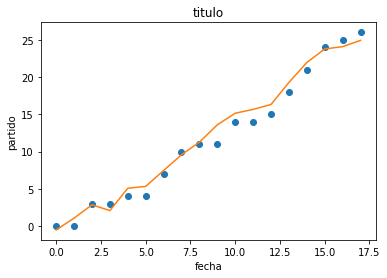

In [135]:
theta_ = np.zeros((8,1))
theta_
theta = gradiente(x,y,theta_,0.01,100000)
    
yprima=[]

mpl.plot(y,"o")
mpl.xlabel("fecha")
mpl.ylabel("partido")
mpl.title("titulo")

for i in range(18):
    yprima.append(theta[0]*x[i,0]+theta[1]*x[i,1]+theta[2]*x[i,2]+theta[3]*x[i,3]+theta[4]*x[i,4]+theta[5]*x[i,5]+theta[6]*x[i,6])

print("fecha 18: ",theta[0]*x[17,0]+theta[1]*(x[17,1]+1)+theta[2]*x[17,2]+theta[3]*x[17,3]
+theta[4]*x[17,4]+theta[5]*x[17,5]+theta[6]*x[17,6])

mpl.plot(yprima,"-")

#theta:  [-1.72800094  1.62468957  1.75862839  0.90252902 -1.18025553 -0.50332185
# -1.10703686]
#fecha 18:  -1.0202565537339487"""

In [140]:
def predic(fecha):
    i=fecha-1
    fecha_ant=theta[0]*x[i,0]+theta[1]*x[i,1]+theta[2]*x[i,2]+theta[3]*x[i,3]+theta[4]*x[i,4]
    +theta[5]*x[i,5]+theta[6]*x[i,6]
    i=i+1
    fecha_hoy=theta[0]*x[i,0]+theta[1]*x[i,1]+theta[2]*x[i,2]+theta[3]*x[i,3]+theta[4]*x[i,4]
    +theta[5]*x[i,5]+theta[6]*x[i,6]
    
    if fecha_hoy-fecha_ant<=0.7:
        print("perdio")
    elif fecha_hoy-fecha_ant>=0.7 and fecha_hoy-fecha_ant<=1.5:
        print("empato")
    elif fecha_hoy-fecha_ant>=1.5 and fecha_hoy-fecha_ant<=4:
        print("gano")

    

In [143]:
predic(15)
predic(10)
predic(9)
predic(2)

gano
perdio
gano
gano
